In [1]:
# Imports
import os

import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2

README

# Drive on Mars

![Mars rover](https://panoptes-uploads.zooniverse.org/production/project_attached_image/17243d9d-1258-4aa7-80f0-6e7b20e957c6.png)

With this project we are attempting to improve the future of self driving vehicles on Mars.
Current autonomous vehicles driving algorithms are trained for streets and roads, very different from the conditions on Mars. 

Our model will predict which kind of terrains lies ahead of a rover: from soil, sand, bedrock or big rocks. This informs a rover navigation on the best route to take. We will build an image segmentation classifier, with a trained model available online.



# To work on this project:

## Clone this repo
`git clone  git@github.com:TigerManon/drive-on-mars.git`

## Download the data from Kaggle

[AI4MARS dataset](https://www.kaggle.com/datasets/yash92328/ai4mars-terrainaware-autonomous-driving-on-mars/data)


```
mv archive.zip <your-path-to-the-repo>/drive-on-mars/raw_data
cd <your-path-to-the-repo>/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip


pip install -r requirements
```

# For our team

Use the following commands

`path-to-the-repo =  ~/code/TigerManon`

```
mv archive.zip ~/code/TigerManon/drive-on-mars/raw_data
cd ~/code/TigerManon/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip

pip install -r requirements
```


## Defining paths

In [2]:
# Customize your path here
root_path = '../'

In [3]:
DATA_PATH = os.path.join(root_path, 'raw_data', 'ai4mars-dataset-merged-0.1', 'msl')
DATA_PATH

'../raw_data/ai4mars-dataset-merged-0.1/msl'

In [4]:
IMAGE_PATH = os.path.join(DATA_PATH, 'images', 'edr')
MASK_PATH_TRAIN = os.path.join(DATA_PATH, 'labels', 'train')
MASK_PATH_TESTS = os.path.join(DATA_PATH, 'labels', 'test')
TESTS_DIR = ['masked-gold-min1-100agree', 'masked-gold-min2-100agree', 'masked-gold-min3-100agree']

MASK_ROVER = os.path.join(DATA_PATH, 'images', 'mxy')
RANGE_30M = os.path.join(DATA_PATH, 'images', 'rng-30m')

In [5]:
def list_data_files():
    images = os.listdir(IMAGE_PATH)
    print(f"Found {len(images)} files in {IMAGE_PATH}")

    rover_masks = os.listdir(MASK_ROVER) 
    print(f"Found {len(rover_masks)} files in {MASK_ROVER}")

    range_masks = os.listdir(RANGE_30M) 
    print(f"Found {len(range_masks)} files in {RANGE_30M}")

    train_masks = os.listdir(MASK_PATH_TRAIN) 
    print(f"Found {len(train_masks)} files in {MASK_PATH_TRAIN}")

    print('-'*20)
    for test_dir in TESTS_DIR:
        test_dir_path = os.path.join(MASK_PATH_TESTS,test_dir)
        print(f"Found {len(os.listdir(test_dir_path))} files in {test_dir_path}")

list_data_files()

Found 18130 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr
Found 18097 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy
Found 18096 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m
Found 16064 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/train
--------------------
Found 322 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree
Found 322 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min2-100agree
Found 322 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min3-100agree


In [6]:
color_channels = 1

### Opening an image

In [7]:
images = sorted(os.listdir(IMAGE_PATH))

In [8]:
# Testing with first image
test = 3
imname = images[test].split('.')[0]
imname

'NLA_397681372EDR_F0020000AUT_04096M1'

In [9]:
image_file = os.path.join(IMAGE_PATH,images[test])
image_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681372EDR_F0020000AUT_04096M1.JPG'

In [10]:
img_raw = cv2.imread(image_file)
img = np.zeros((1024,1024))
img[:,:] = img_raw[:,:,0]
img

array([[179., 180., 178., ..., 251., 233., 206.],
       [105., 105., 104., ...,  96.,  96.,  82.],
       [ 95.,  93.,  93., ...,  82.,  85.,  75.],
       ...,
       [ 59.,  39.,  25., ...,  17.,  17.,  14.],
       [ 52.,  46.,  42., ...,  20.,  19.,  16.],
       [124., 122., 121., ...,  50.,  49.,  45.]])

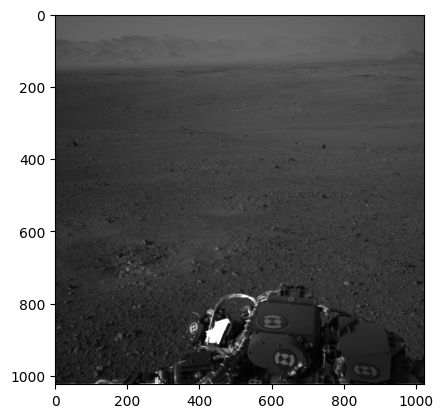

In [11]:
plt.imshow(img,cmap='gray')

### Opening rover and range masks

In [12]:
mask_file = os.path.join(MASK_ROVER, imname.replace("EDR","MXY") + ".png")
mask_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy/NLA_397681372MXY_F0020000AUT_04096M1.png'

In [13]:
mask_raw = np.array(cv2.imread(mask_file))
mask_raw
mask = np.zeros((1024,1024))
mask[:,:] = mask_raw[:,:,0]
mask = 1-mask

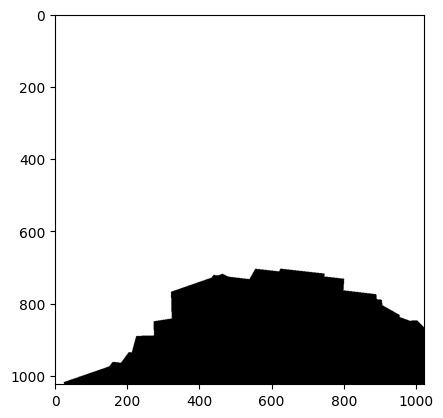

In [14]:
plt.imshow(mask,cmap='gray') 
plt.title;

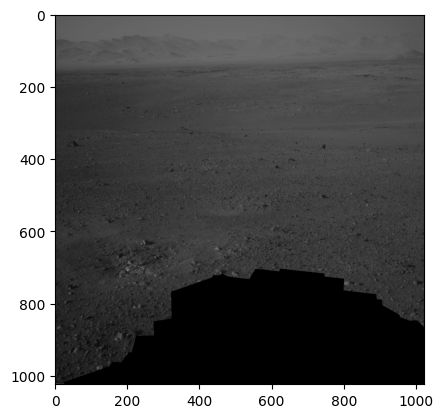

In [15]:
img_mask = img * mask
plt.imshow(img_mask,cmap='gray') ;

In [16]:
range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
range_mask_file


'../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m/NLA_397681372RNG_F0020000AUT_04096M1.png'

In [17]:
range_30m_raw = np.array(cv2.imread(range_mask_file))

range_30m = np.zeros((1024,1024))
range_30m[:,:] = range_30m_raw[:,:,0]
range_30m = 1 - range_30m
range_30m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

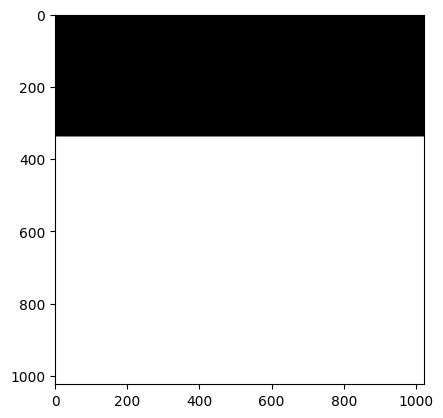

In [18]:
plt.imshow(range_30m,cmap='gray') ;

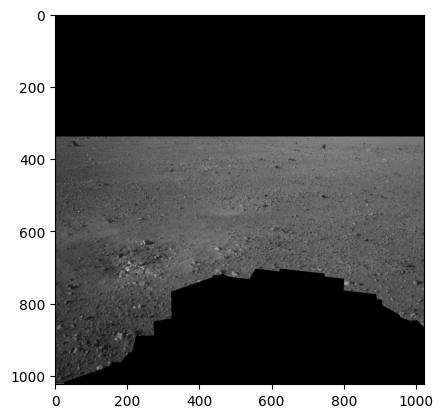

In [19]:
img_mask = img * mask * range_30m
plt.imshow(img_mask,cmap='gray') ;

## Load data methods

In [20]:
def create_df(path):
    """
    Loading images with corresponding masks and labels
    """
    names = []
    labels = []
    
    for filename in sorted(os.listdir(path)):
        imname = filename.split('.')[0]
        
        label = imname
        imname = imname.replace("_merged","")
        
        # checking raw image
        raw_image_file = os.path.join(IMAGE_PATH,imname + ".JPG")
        if not os.path.isfile(raw_image_file):
            print('No raw image found for', imname)
            continue
        
        # checking rover masks
        mask_rover_file = os.path.join(MASK_ROVER,imname.replace("EDR","MXY") + ".png")
        if not os.path.isfile(mask_rover_file):
            print('No rover mask found for', imname)
            continue
            
        # checking range masks
        range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
        if not os.path.isfile(range_mask_file):
            print('No range mask found for', imname)
            continue
            
        names.append(imname)
        labels.append(label)
        
    df = pd.DataFrame(
        {'name': names, 'label': labels}, 
        index = np.arange(0, len(names)))
    df['rov_mask'] = df.name.apply(lambda imname: imname.replace("EDR","MXY"))
    df['rang_mask'] = df.name.apply(lambda imname: imname.replace("EDR","RNG"))
    
    return df

In [21]:
df_train = create_df(MASK_PATH_TRAIN)
df_train

No range mask found for NLB_432655207EDR_F0160148NCAM00394M1


name  \
0      NLA_397586934EDR_F0010008AUT_04096M1   
1      NLA_397681339EDR_F0020000AUT_04096M1   
2      NLA_397681372EDR_F0020000AUT_04096M1   
3      NLA_397681398EDR_F0020000AUT_04096M1   
4      NLA_397681429EDR_F0020000AUT_04096M1   
...                                     ...   
16058  NRB_588896093EDR_F0721616NCAM00312M1   
16059  NRB_589338714EDR_F0722272NCAM00260M1   
16060  NRB_589344414EDR_F0722272NCAM00272M1   
16061  NRB_605858122EDR_F0750000NCAM00288M1   
16062  NRB_606479584EDR_F0750456NCAM00294M1   

                                      label  \
0      NLA_397586934EDR_F0010008AUT_04096M1   
1      NLA_397681339EDR_F0020000AUT_04096M1   
2      NLA_397681372EDR_F0020000AUT_04096M1   
3      NLA_397681398EDR_F0020000AUT_04096M1   
4      NLA_397681429EDR_F0020000AUT_04096M1   
...                                     ...   
16058  NRB_588896093EDR_F0721616NCAM00312M1   
16059  NRB_589338714EDR_F0722272NCAM00260M1   
16060  NRB_589344414EDR_F0722272NCAM00272M1   
16061  NRB_605858122EDR_F0750000NCAM00288M1   
16062  NRB_606479584EDR_F0750456NCAM00294M1   

                                   rov_mask  \
0      NLA_397586934MXY_F0010008AUT_04096M1   
1      NLA_397681339MXY_F0020000AUT_04096M1   
2      NLA_397681372MXY_F0020000AUT_04096M1   
3      NLA_397681398MXY_F0020000AUT_04096M1   
4      NLA_397681429MXY_F0020000AUT_04096M1   
...                                     ...   
16058  NRB_588896093MXY_F0721616NCAM00312M1   
16059  NRB_589338714MXY_F0722272NCAM00260M1   
16060  NRB_589344414MXY_F0722272NCAM00272M1   
16061  NRB_605858122MXY_F0750000NCAM00288M1   
16062  NRB_606479584MXY_F0750456NCAM00294M1   

                                  rang_mask  
0      NLA_397586934RNG_F0010008AUT_04096M1  
1      NLA_397681339RNG_F0020000AUT_04096M1  
2      NLA_397681372RNG_F0020000AUT_04096M1  
3      NLA_397681398RNG_F0020000AUT_04096M1  
4      NLA_397681429RNG_F0020000AUT_04096M1  
...                                     ...  
16058  NRB_588896093RNG_F0721616NCAM00312M1  
16059  NRB_589338714RNG_F0722272NCAM00260M1  
16060  NRB_589344414RNG_F0722272NCAM00272M1  
16061  NRB_605858122RNG_F0750000NCAM00288M1  
16062  NRB_606479584RNG_F0750456NCAM00294M1  

[16063 rows x 4 columns]

In [22]:
MASK_PATH_TEST3 = os.path.join(MASK_PATH_TESTS, TESTS_DIR[0])
df_test = create_df(MASK_PATH_TEST3)
df_test

name  \
0    NLA_409036068EDR_F0051606NCAM00348M1   
1    NLA_409036116EDR_F0051606NCAM00348M1   
2    NLA_409036860EDR_F0051662NCAM00346M1   
3    NLA_409036993EDR_F0051662NCAM05703M1   
4    NLA_409037112EDR_F0051662NCAM05703M1   
..                                    ...   
317  NLB_613583373EDR_F0760568NCAM00280M1   
318  NLB_613583763EDR_F0760568NCAM00354M1   
319  NLB_613583877EDR_F0760568NCAM00354M1   
320  NLB_613584057EDR_F0760568NCAM00281M1   
321  NLB_613584326EDR_F0760568NCAM00281M1   

                                           label  \
0    NLA_409036068EDR_F0051606NCAM00348M1_merged   
1    NLA_409036116EDR_F0051606NCAM00348M1_merged   
2    NLA_409036860EDR_F0051662NCAM00346M1_merged   
3    NLA_409036993EDR_F0051662NCAM05703M1_merged   
4    NLA_409037112EDR_F0051662NCAM05703M1_merged   
..                                           ...   
317  NLB_613583373EDR_F0760568NCAM00280M1_merged   
318  NLB_613583763EDR_F0760568NCAM00354M1_merged   
319  NLB_613583877EDR_F0760568NCAM00354M1_merged   
320  NLB_613584057EDR_F0760568NCAM00281M1_merged   
321  NLB_613584326EDR_F0760568NCAM00281M1_merged   

                                 rov_mask  \
0    NLA_409036068MXY_F0051606NCAM00348M1   
1    NLA_409036116MXY_F0051606NCAM00348M1   
2    NLA_409036860MXY_F0051662NCAM00346M1   
3    NLA_409036993MXY_F0051662NCAM05703M1   
4    NLA_409037112MXY_F0051662NCAM05703M1   
..                                    ...   
317  NLB_613583373MXY_F0760568NCAM00280M1   
318  NLB_613583763MXY_F0760568NCAM00354M1   
319  NLB_613583877MXY_F0760568NCAM00354M1   
320  NLB_613584057MXY_F0760568NCAM00281M1   
321  NLB_613584326MXY_F0760568NCAM00281M1   

                                rang_mask  
0    NLA_409036068RNG_F0051606NCAM00348M1  
1    NLA_409036116RNG_F0051606NCAM00348M1  
2    NLA_409036860RNG_F0051662NCAM00346M1  
3    NLA_409036993RNG_F0051662NCAM05703M1  
4    NLA_409037112RNG_F0051662NCAM05703M1  
..                                    ...  
317  NLB_613583373RNG_F0760568NCAM00280M1  
318  NLB_613583763RNG_F0760568NCAM00354M1  
319  NLB_613583877RNG_F0760568NCAM00354M1  
320  NLB_613584057RNG_F0760568NCAM00281M1  
321  NLB_613584326RNG_F0760568NCAM00281M1  

[322 rows x 4 columns]

In [23]:
labels_key = {
    0: 'soil',
    1: 'bedrock',
    2: 'sand',
    3: 'big rock',
    4: '(no label)',
}

custom_colors = {
    0: 'blue',
    1: 'yellow',
    2: 'purple',
    3: 'red',
    4: 'white',
}

cmap_labels = ListedColormap([custom_colors[i] for i in range(max(custom_colors)+1)])

In [24]:
def load_image_set(im_id, df):
    
    # Load raw image
    edr_file = f'{df.name.iloc[im_id]}.JPG'
    image_raw = cv2.imread(os.path.join(IMAGE_PATH,edr_file))
    image = image_raw[:,:,0]

    # Load labels
    label_file = f'{df.label.iloc[im_id]}.png'
    label_raw = cv2.imread(os.path.join(MASK_PATH_TRAIN,label_file))
    label = label_raw[:,:,0]
    
    # Changing scale for the 'No label' encoded as 255 
    label[label == 255] = 4
    
    # Load and combine both masks
    rov_mask_file = f'{df.rov_mask.iloc[im_id]}.png'
    rov_mask_raw = np.array(cv2.imread(os.path.join(MASK_ROVER,rov_mask_file)))
    rov_mask = np.zeros((1024,1024))
    rov_mask[:,:] = rov_mask_raw[:,:,0]
    
    rang_mask_file = f'{df.rang_mask.iloc[im_id]}.png'
    rang_mask_raw = np.array(cv2.imread(os.path.join(RANGE_30M,rang_mask_file)))
    rang_mask = np.zeros((1024,1024))
    rang_mask[:,:] = rang_mask_raw[:,:,0]
    
    # reversing mask to only keep the image out of the mask
    mask = (1-rov_mask) * (1-rang_mask)
    
    return image, label, mask

In [25]:
def decompose_label(label_img):
    
    label_0 = np.where(label_img == 0, 1, 0)
    label_1 = np.where(label_img == 1, 1, 0)
    label_2 = np.where(label_img == 2, 1, 0)
    label_3 = np.where(label_img == 3, 1, 0)
    label_4 = np.where(label_img == 4, 1, 0)
    
    return np.array([label_0, label_1, label_2, label_3, label_4])



In [26]:
def load_images(df):
    """
    Aggregates images and labels with masks applied
    Input: Dataframe of train or test sets
    Output: Array of
        masked images from raws
        masked labels
    """
    X, y = [], []
    for i in df.index:
        [image, label, mask] = load_image_set(i, df)

        X.append(image * mask)
        y.append(label * mask)

    X = np.array(X)
    y = np.array(y)
    print('✅ loaded raw images and labels')
    y_decomp = decompose_label(y)
    print('✅ decomposed labels into binary masks')

    return X, y_decomp

X,y = load_images(df_train.iloc[:200])

✅ loaded raw images and labels
✅ decomposed labels into binary masks


In [27]:
X.shape

(200, 1024, 1024)

In [28]:
def show_image(image, mask=None):
    
    n_sub = 1
    if mask is not None:
        n_sub=2
    fig, ax = plt.subplots(1, n_sub, figsize=(16,9))
    
    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Raw image')
    
    if n_sub==2:
        ax[1].axis('off')
        ax[1].imshow(image*mask, cmap='gray')
        ax[1].set_title('Masked')
        

351
365
456


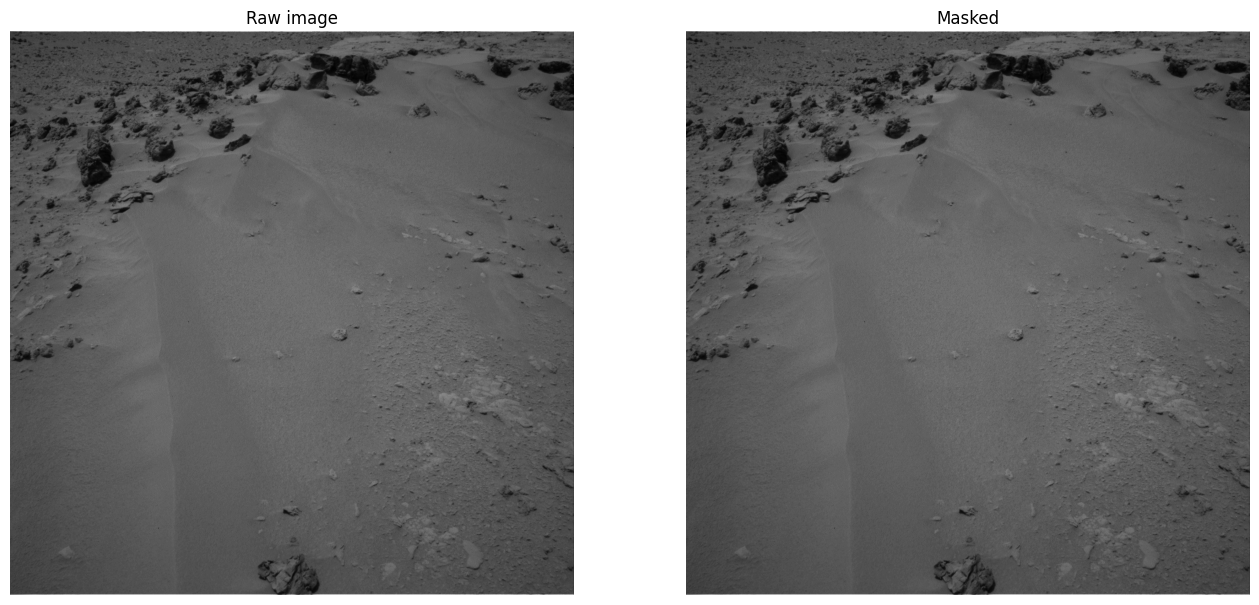

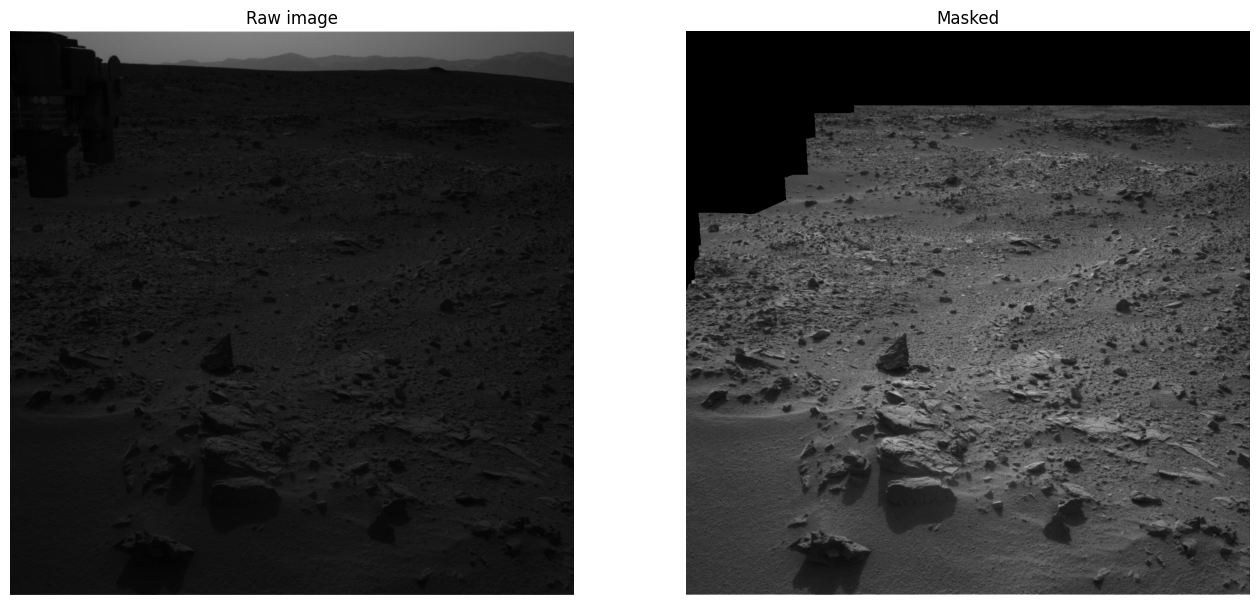

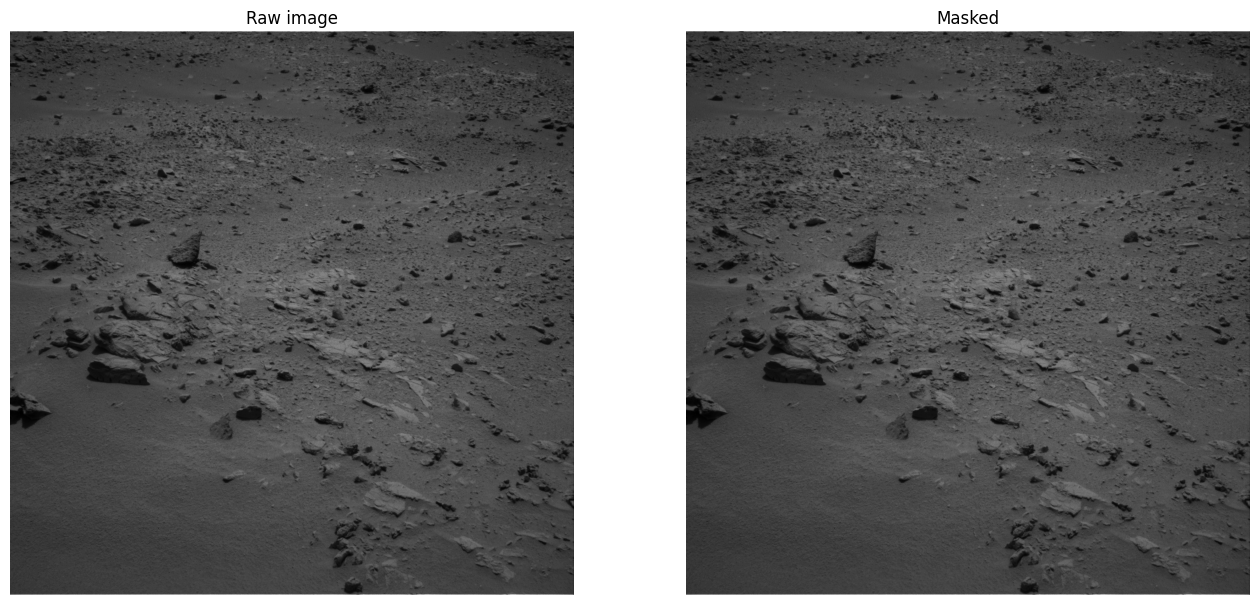

In [29]:
# Showing examples of images where there is a variety of terrains
for i in range(500):
    image, label, mask = load_image_set(i, df_train)
    if len(np.unique(label))>4:
        print(i)
        show_image(image, mask)
        

In [30]:
# Picking just one example to work on for the rest of the notebook
ex_id = 456

image, label, mask = load_image_set(ex_id, df_train)

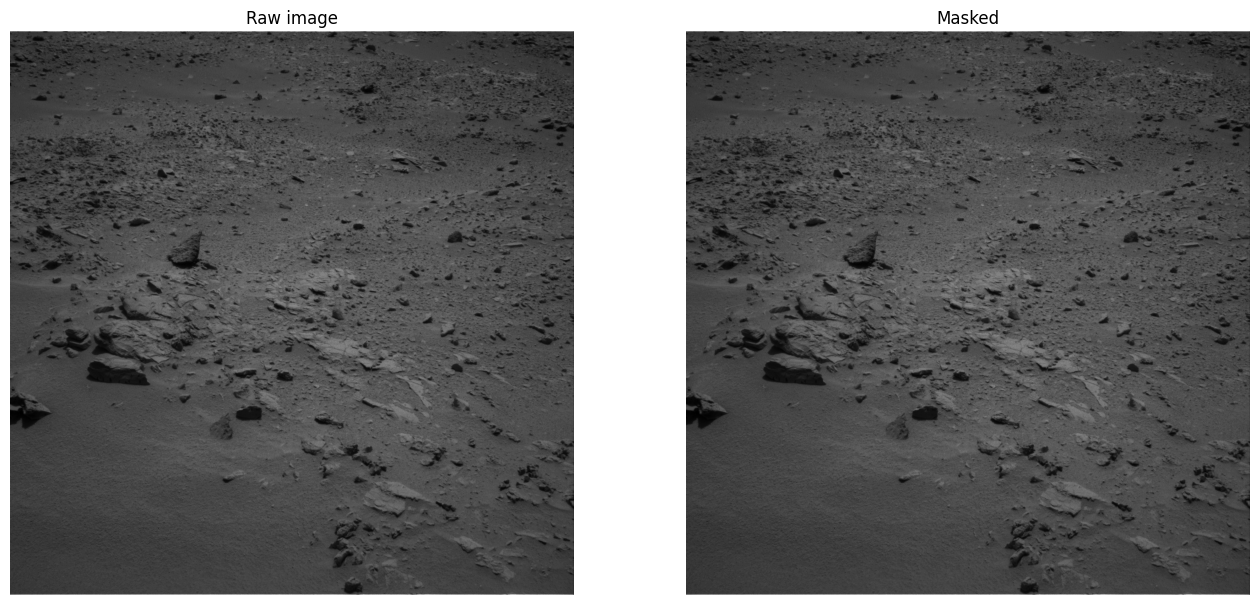

In [31]:
show_image(image, mask)

In [32]:
decomp = decompose_label(label)
decomp.shape

(5, 1024, 1024)

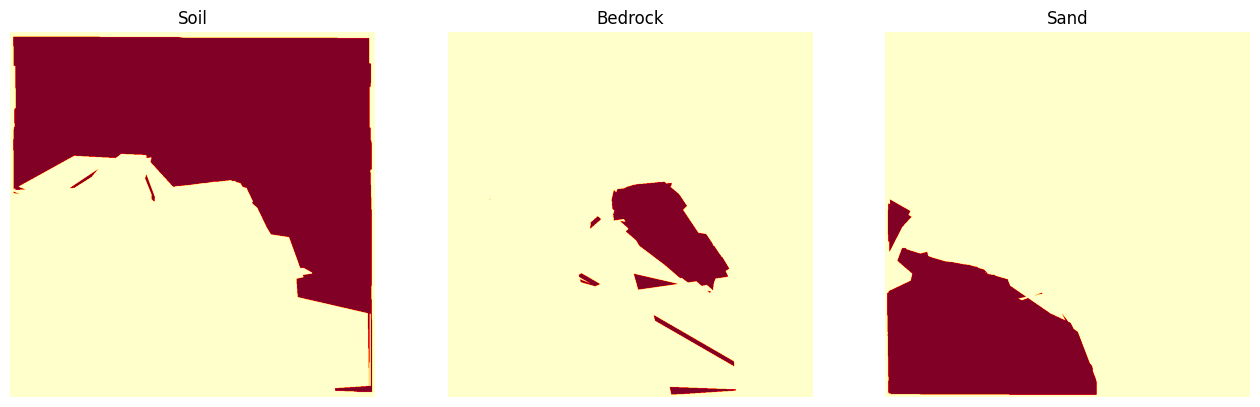

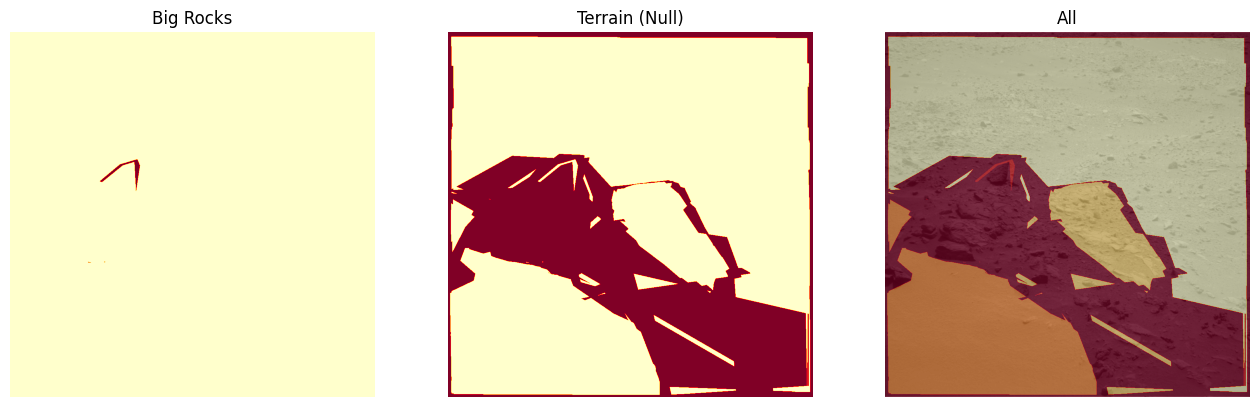

In [33]:
def show_labels_indv(label,image): 

    label_0, label_1, label_2, label_3, label_4 = decompose_label(label)
    
    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_0, cmap='YlOrRd')
    ax[0].set_title('Soil')
    ax[1].axis('off')
    ax[1].imshow(label_1, cmap='YlOrRd')
    ax[1].set_title('Bedrock')
    ax[2].axis('off')
    ax[2].imshow(label_2, cmap='YlOrRd')
    ax[2].set_title('Sand')

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_3, cmap='YlOrRd')
    ax[0].set_title('Big Rocks')
    ax[1].axis('off')
    ax[1].imshow(label_4,cmap='YlOrRd')
    ax[1].set_title('Terrain (Null)')

    ax[2].axis('off')
    ax[2].imshow(image,cmap='gray')
    ax[2].imshow(label, alpha =0.6, cmap='YlOrRd')

    ax[2].set_title('All')
    
show_labels_indv(label,image)

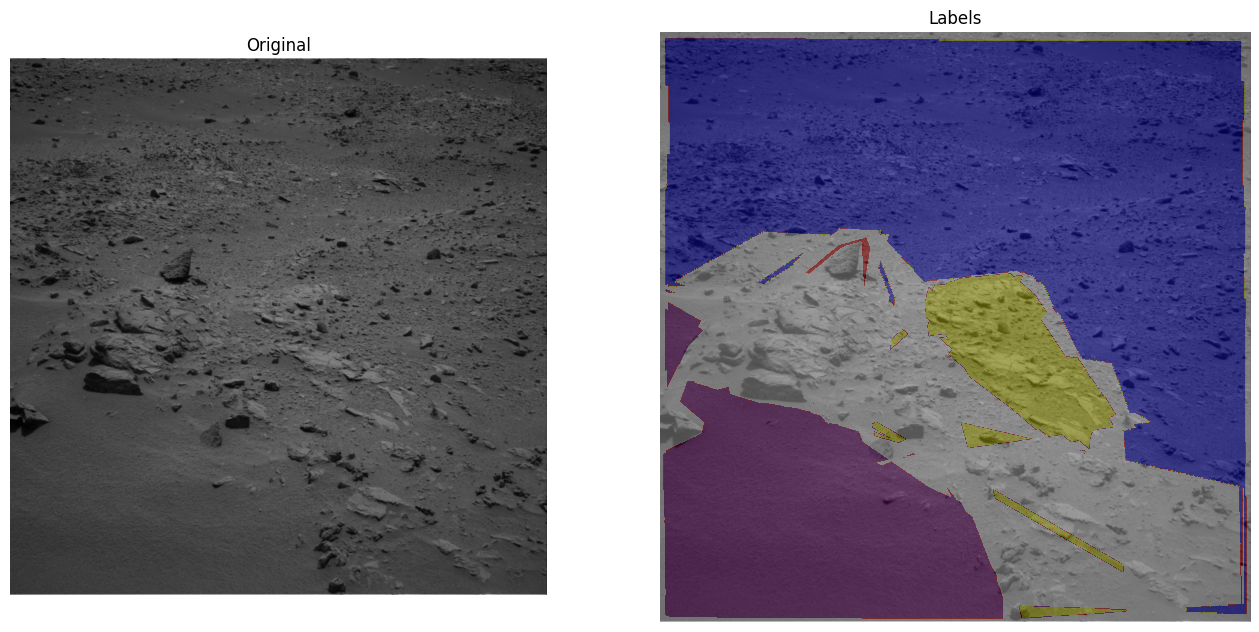

In [34]:
def show_labels_comp(image,label):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [2, 2.2]})

    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    ax[0].set_title('Original')

    ax[1].axis('off')
    ax[1].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    img = ax[1].imshow(label, alpha=0.3, cmap=cmap_labels, aspect='equal')  # Set aspect='equal' for square
    ax[1].set_title('Labels')

#     divider = make_axes_locatable(ax[1])
#     cbar_ax = divider.append_axes("right", size="5%", pad=0.2)  # Adjust the size and pad

#     # Add colorbar to the right subplot
#     cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.unique(label), orientation='vertical')

#     # Add tick labels to the colorbar
#     tick_labels = labels_key.values()
#     cbar.set_ticks(np.unique(label))
#     cbar.set_ticklabels(tick_labels)
#     cbar.ax.tick_params(axis='y', length=0)
#     cbar.ax.set_yticklabels(tick_labels, va='center')


    plt.show()
show_labels_comp(image,label)

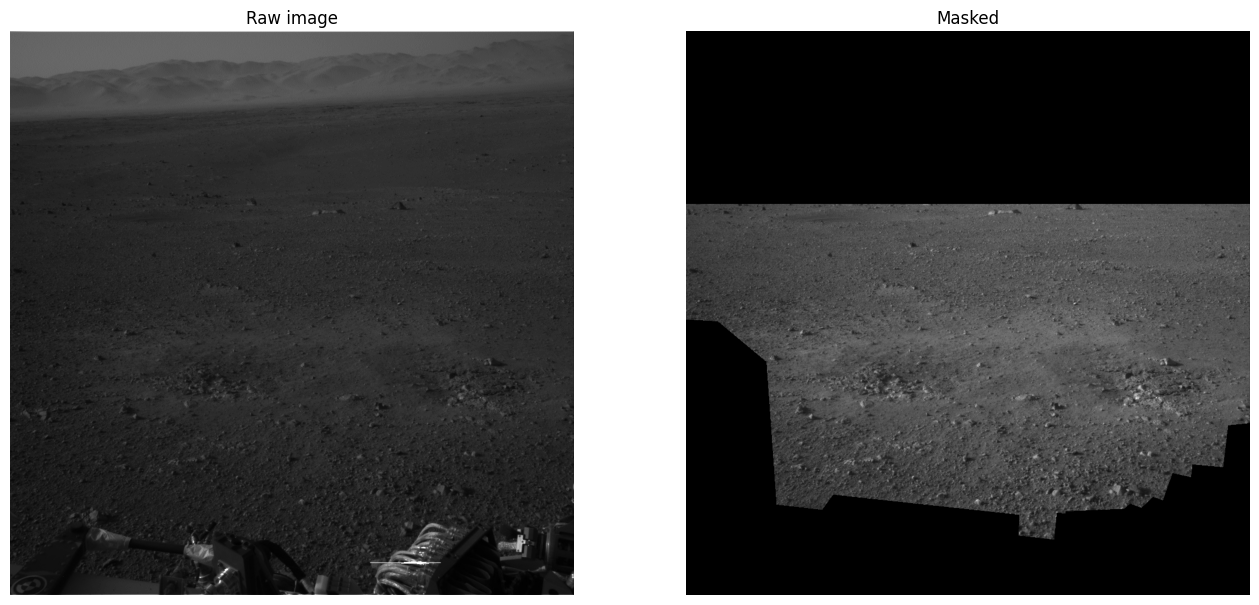

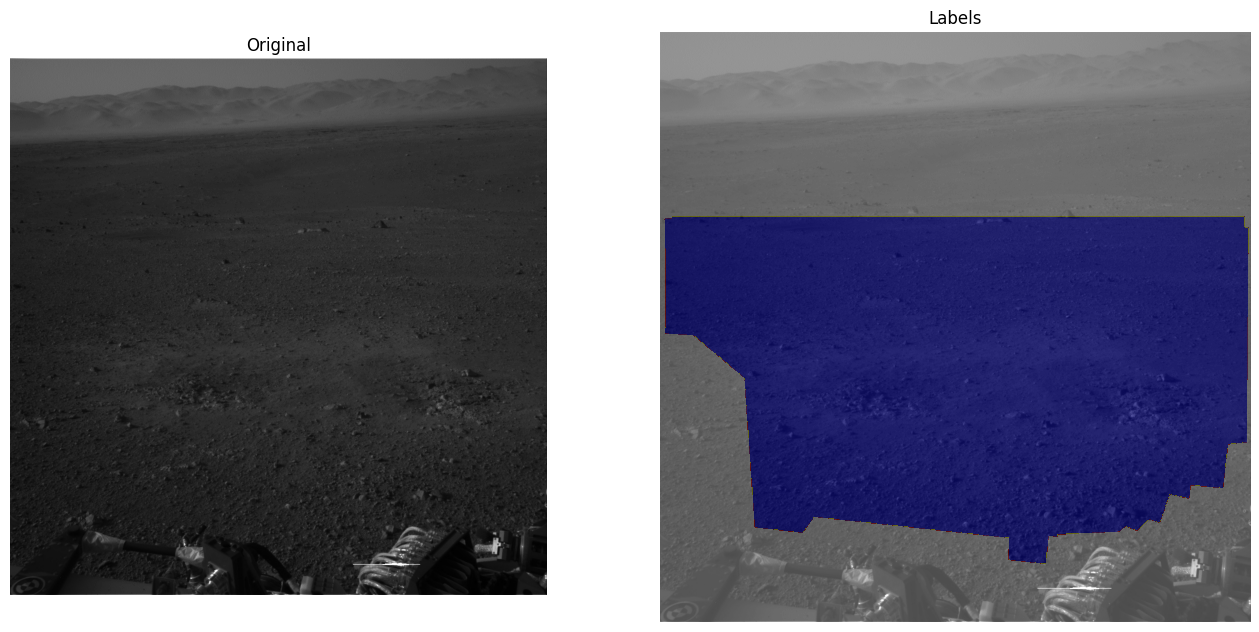

In [35]:
# Another example

image, label, mask = load_image_set(1, df_train)
show_image(image, mask)

show_labels_comp(image,label)

## Checking the images in the test set

In [36]:
TESTS_DIR

['masked-gold-min1-100agree',
 'masked-gold-min2-100agree',
 'masked-gold-min3-100agree']

In [37]:
dir_ = os.path.join(MASK_PATH_TESTS,TESTS_DIR[0])
print(dir_)
df_test = create_df(dir_)
print(len(df_test))
df_test.head()

../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree
322


name  \
0  NLA_409036068EDR_F0051606NCAM00348M1   
1  NLA_409036116EDR_F0051606NCAM00348M1   
2  NLA_409036860EDR_F0051662NCAM00346M1   
3  NLA_409036993EDR_F0051662NCAM05703M1   
4  NLA_409037112EDR_F0051662NCAM05703M1   

                                         label  \
0  NLA_409036068EDR_F0051606NCAM00348M1_merged   
1  NLA_409036116EDR_F0051606NCAM00348M1_merged   
2  NLA_409036860EDR_F0051662NCAM00346M1_merged   
3  NLA_409036993EDR_F0051662NCAM05703M1_merged   
4  NLA_409037112EDR_F0051662NCAM05703M1_merged   

                               rov_mask                             rang_mask  
0  NLA_409036068MXY_F0051606NCAM00348M1  NLA_409036068RNG_F0051606NCAM00348M1  
1  NLA_409036116MXY_F0051606NCAM00348M1  NLA_409036116RNG_F0051606NCAM00348M1  
2  NLA_409036860MXY_F0051662NCAM00346M1  NLA_409036860RNG_F0051662NCAM00346M1  
3  NLA_409036993MXY_F0051662NCAM05703M1  NLA_409036993RNG_F0051662NCAM05703M1  
4  NLA_409037112MXY_F0051662NCAM05703M1  NLA_409037112RNG_F0051662NCAM05703M1

In [38]:
dir_ = os.path.join(MASK_PATH_TESTS,TESTS_DIR[1])
print(dir_)
df_test = create_df(dir_)
print(len(df_test))
df_test.head()

../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min2-100agree
322


name  \
0  NLA_409036068EDR_F0051606NCAM00348M1   
1  NLA_409036116EDR_F0051606NCAM00348M1   
2  NLA_409036860EDR_F0051662NCAM00346M1   
3  NLA_409036993EDR_F0051662NCAM05703M1   
4  NLA_409037112EDR_F0051662NCAM05703M1   

                                         label  \
0  NLA_409036068EDR_F0051606NCAM00348M1_merged   
1  NLA_409036116EDR_F0051606NCAM00348M1_merged   
2  NLA_409036860EDR_F0051662NCAM00346M1_merged   
3  NLA_409036993EDR_F0051662NCAM05703M1_merged   
4  NLA_409037112EDR_F0051662NCAM05703M1_merged   

                               rov_mask                             rang_mask  
0  NLA_409036068MXY_F0051606NCAM00348M1  NLA_409036068RNG_F0051606NCAM00348M1  
1  NLA_409036116MXY_F0051606NCAM00348M1  NLA_409036116RNG_F0051606NCAM00348M1  
2  NLA_409036860MXY_F0051662NCAM00346M1  NLA_409036860RNG_F0051662NCAM00346M1  
3  NLA_409036993MXY_F0051662NCAM05703M1  NLA_409036993RNG_F0051662NCAM05703M1  
4  NLA_409037112MXY_F0051662NCAM05703M1  NLA_409037112RNG_F0051662NCAM05703M1

# Data augmentation

In [39]:
# import albumentations as A

# Use scripts

In [40]:
small_dataset = 100

df = create_df(MASK_PATH_TRAIN)

df = df.iloc[:100]

X, y = load_images(df)

No range mask found for NLB_432655207EDR_F0160148NCAM00394M1
✅ loaded raw images and labels
✅ decomposed labels into binary masks


In [41]:
X.shape, y.shape

((100, 1024, 1024), (5, 100, 1024, 1024))

# Try Predict


In [30]:
from drive_on_mars.model.model import initialize_model, compile_model, train_model
from drive_on_mars.model.registry import save_model, save_results, load_model
from drive_on_mars.model.data import create_df, preproc_image, load_mask, preproc, load_preproc, decompose_label, load_images
from drive_on_mars.main import pred
import numpy as np
import os
import pandas as pd
import cv2

In [15]:
model = load_model()


Load latest model from local registry...

Load latest model from disk...


2023-12-12 16:31:11.443074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/gargantua/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../lib64:
2023-12-12 16:31:11.445117: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-12 16:31:11.446333: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Jinjin): /proc/driver/nvidia/version does not exist
2023-12-12 16:31:11.465068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropri

✅ Model compiled
✅ Model loaded from local disk


In [53]:
# Preprocess d'une seule image
img_test = '/home/gargantua/code/TigerManon/08-Palette/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_420760070EDR_F0060000NCAM12754M1.JPG'
X_pred_processed = preproc_image(img_test)
X_pred_processed = np.array([X_pred_processed])
X_pred_processed.shape

(1, 256, 256, 3)

In [54]:
# Créer la prediction
y_pred = model.predict(X_pred_processed)
print(f"✅ pred() done")
y_pred.shape

1/1 [==============================] - 0s 250ms/step
✅ pred() done


(1, 256, 256, 5)

In [55]:
pred_mask = y_pred[0,... ]

In [56]:
pred_mask

array([[[1.6698018e-02, 3.9907945e-03, 9.8079052e-03, 7.0933887e-04,
         9.6879387e-01],
        [6.6701346e-04, 2.1350315e-04, 5.0985842e-04, 1.2951219e-05,
         9.9859667e-01],
        [3.8996237e-04, 2.8539263e-04, 2.9150344e-04, 1.5543121e-05,
         9.9901754e-01],
        ...,
        [9.9183258e-04, 5.4053671e-04, 4.0211133e-04, 2.6871783e-05,
         9.9803859e-01],
        [4.4681851e-04, 8.0998091e-04, 2.1977809e-04, 5.3564250e-05,
         9.9846989e-01],
        [1.1346615e-03, 3.4040266e-03, 1.0861061e-03, 3.1716251e-04,
         9.9405795e-01]],

       [[3.0461271e-04, 7.2914874e-04, 1.7211899e-04, 4.9814203e-06,
         9.9878907e-01],
        [4.7600738e-06, 8.6957689e-06, 2.0786777e-06, 5.6084937e-09,
         9.9998444e-01],
        [1.4982291e-05, 5.2962307e-05, 4.5007096e-06, 3.3730782e-08,
         9.9992746e-01],
        ...,
        [7.0313210e-05, 2.5493762e-04, 9.7365592e-06, 1.6104286e-07,
         9.9966490e-01],
        [2.8409184e-05, 2.964047

In [58]:
import numpy as np

def mean_iou_score(pred_label, true_label):
    """
    
    :param pred_mask:  (height, width, num_classes)
    :param true_mask:  (height, width, num_classes)
    :return: average IOU score
    """

    pred_mask = np.squeeze(pred_mask)
    true_mask = np.squeeze(true_mask)

    total_intersection = 0
    total_union = 0

    for c in range(pred_mask.shape[-1]):  
        pred_c = pred_mask[..., c]
        true_c = true_mask[..., c]

        intersection = np.logical_and(pred_c, true_c)
        union = np.logical_or(pred_c, true_c)

        total_intersection += np.sum(intersection)
        total_union += np.sum(union)

    if total_union == 0:
        mean_iou = 0
    else:
        mean_iou = total_intersection / total_union
    
    return mean_iou


In [59]:
lab_test = '/home/gargantua/code/TigerManon/08-Palette/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_420760070EDR_F0060000NCAM12754M1.png'

In [60]:
#-------------------------------#
#   Get image path and label path of each batch from path_df
#-------------------------------#                     
#jpg = path_df.iloc[i]["image_path"]
#png = path_df.iloc[i]["label_path"]
    
#-------------------------------#
#   Transform images and labels to numpy array, resize them
#   Set the background label to 4
#-------------------------------#

#jpg = cv2.imread(jpg)           
png = cv2.imread(lab_test,0)

#jpg = cv2.resize(jpg, dsize = (int(256), int(256)))
png = cv2.resize(png, dsize = (int(256), int(256)), 
                            interpolation = cv2.INTER_NEAREST)

png[png == 255] = 4

seg_labels = np.eye(5)[png.reshape([-1])]                
seg_labels = seg_labels.reshape((int(256), int(256), 5))

seg_labels

array([[[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]],

       [[0.,

In [61]:
seg_labels.shape

(256, 256, 5)

In [62]:
score = mean_iou_score(seg_labels, pred_mask)

UnboundLocalError: local variable 'pred_mask' referenced before assignment

In [40]:
score

0.2

In [63]:
a = '/home/gargantua/code/TigerManon/08-Palette/ai4mars-dataset-merged-0.1/msl/images'

In [64]:
b = os.path.join(a,'/mxy')

In [65]:
b


'/mxy'